# Project: Investigate & Visualize a Dataset(Russian Company Sales)

 ## Table of Content:
<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#wrangling'>Data Wrangling</a></li>
    <li><a href='#eda'>Exploratory Data Analysis</a></li>
    <li><a href='#conclusions'>Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**DataSet** 
* In this project we will analyze sales data,  for one of the largest Russian software firms - [1C Company](https://1c.ru/eng/title.htm) you can find datafiles [here](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data). 

**File descriptions related to our study**<a id='files'></a>
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

**Project Goal**
 
* **Answer The Following Question**
<ul>
    <li>Relation between sales qty & sales price</li>
    <li>Compute sales per month & year </li>
    <li>What is the Top 10 categories & least 10 categories</li>
    <li>What is the Top 10 shops & least 10 shops</li>
    <li>What is the best 10 items and the least 10 items</li>
    <li>Which Month have the best sales & in which year</li>
    <li>Explore Sales by year</li>
</ul>


**Data columns related to our study:**
- ID - an Id that represents a (Shop, Item) tuple within the test set.
- shop_id - unique identifier of a shop.
- item_id - unique identifier of a product.
- item_category_id - unique identifier of item category.
- item_cnt_day - number of products sold.
- item_price - current price of an item.
- date - date in format dd/mm/yyyy.
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33.
- item_name - name of item.
- shop_name - name of shop.
- item_category_name - name of item category.

Hint: This dataset is permitted to be used for any purpose, including commercial use.

In [1]:
# Basic imports
import sqlite3
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


<a id='wrangling'></a>
## Data Wrangling

**Process Contains**
<ol>
     <li>Gathering Data</li>
     <li>Assessing Data</li>
</ol>

will move in each process step by step

#### 1- Gathering Data

* We get Dataset in a seperate files & each file contains a main information of the data as mentioned <a href='#files'>above</a>, so we will work following these steps:
    - Import Data Files.
    - SQL Connection & Insert Data into SQL: Save the required information into RDBMS using SQLit. 
    - Merge Data togther in one file to start sales analysis. 

In [2]:
# create loading file function
def load_csv(fname):
    '''load csv file
        Args:
            fname(str): filename if in same directory or full file bath
        Return: DataFrame
    
    '''
    try:
        df = pd.read_csv(fname)
        df.name = fname.split('\\')[-1].split('.')[0]
        return df
    except FileNotFoundError:
        print(f'ERROR: No such file or directory:{fname}')

In [3]:
# create check dataset function

def check_data(df,rows_num=5): 
    '''check number of rows, columns & check some of rows
        Args:  
            df: DataFrame.
            rows_num(int,5): number of rows set 5 by default
        print: 
            number of rows & columns
            Top and Last rows
    '''
    print(f'{df.name} dataset consists of {df.shape[0]} rows and {df.shape[1]} columns')
    print(f'Top {rows_num} rows')
    display(df.head(rows_num))
    print(f'Last {rows_num} rows')
    display(df.tail(rows_num))

**Import Data files**
   
   1- item_categories file

In [4]:
# load item_categories.csv
ctg_df = load_csv('Datasets\Company_Sales\item_categories.csv')

In [5]:
# apply check_data() function on ctg_df
check_data(ctg_df)

item_categories dataset consists of 84 rows and 2 columns
Top 5 rows


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Last 5 rows


,item_category_name,item_category_id
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


In [6]:
# check unique item in categories
ctg_df.nunique()

item_category_name    84
item_category_id      84
dtype: int64

2- shops file

In [7]:
# load shops.csv
shops_df = load_csv('Datasets\Company_Sales\shops.csv')

In [8]:
# apply check_data() function on shops_df
check_data(shops_df)

shops dataset consists of 60 rows and 2 columns
Top 5 rows


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Last 5 rows


,shop_name,shop_id
55,Цифровой склад 1С-Онлайн,55
56,"Чехов ТРЦ ""Карнавал""",56
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58
59,"Ярославль ТЦ ""Альтаир""",59


In [9]:
# check unique item in categories
shops_df.nunique()

shop_name    60
shop_id      60
dtype: int64

3- items file

In [10]:
# load shops.csv
items_df = load_csv('Datasets\Company_Sales\items.csv')

In [11]:
# apply check_data() function on shops_df
check_data(items_df)

items dataset consists of 22170 rows and 3 columns
Top 5 rows


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


Last 5 rows


,item_name,item_id,item_category_id
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62
22169,Яйцо дракона (Игра престолов),22169,69


In [12]:
# check unique item in categories
items_df.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [13]:
# load shops.csv
sales_df = load_csv('Datasets\Company_Sales\sales_train.csv')

In [14]:
# apply check_data() function on shops_df
check_data(sales_df)

sales_train dataset consists of 2935849 rows and 6 columns
Top 5 rows


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Last 5 rows


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


**SQL Connection & Insert Data into SQL**

In [15]:
connection = sqlite3.connect('Database\OneCCompany.db')

In [16]:
def insert_col_sql(conn,sql_tbname,df_series):
    '''insert dataframe series to sql 
        Args: 
            conn: sql connection
            sql_tbname(str):'SQL Table Name'
            df_series: dataframe series need to insert to sql
        print: 
            if successfuly inserted or failed
    '''
    try:
        print("Updating OneCComapny Database...")
        df_series.to_sql(sql_tbname,con=conn,if_exists='append',index=False)
        print("Data inserted Successuly")
    except sqlite3.IntegrityError:
        print("Duplicate Error: Data Inserted before")
    except Exception as e:
        print("e is : {}".format(e))
        print(type(e).__name__)
        print('Failed to Insert New data') 

In [17]:
# insert item_category_name into categories table
insert_col_sql(connection,'categories',ctg_df['item_category_name'])

Updating OneCComapny Database...
Duplicate Error: Data Inserted before


In [18]:
# insert shop_name into shops table
insert_col_sql(connection,'shops',shops_df['shop_name'])

Updating OneCComapny Database...
Duplicate Error: Data Inserted before


In [19]:
# insert shop_name into shops table
insert_col_sql(connection,'shops',shops_df['shop_name'])

Updating OneCComapny Database...
Duplicate Error: Data Inserted before


In [20]:
def insert_df_sql(conn,sql_tbname,df,exists='append'):
    '''insert dataframe series to sql 
        Args: 
            conn: sql connection
            sql_tbname(str):'SQL Table Name'
            df_series: dataframe series need to insert to sql
            exists(str,append): dealing with data if table exists append by default 
        print: 
            if successfuly inserted or failed
    '''
    try:
        print("Updating OneCComapny Database...")
        df.to_sql(sql_tbname,con=conn,if_exists=exists,index=False)
        print("Data inserted Successuly")
    except sqlite3.IntegrityError:
        print("Duplicate Error: Data Inserted before")
    except Exception as e:
        print("e is : {}".format(e))
        print(type(e).__name__)
        print('Failed to Insert New data')

In [21]:
# insert items df
insert_df_sql(connection, 'items', items_df)

Updating OneCComapny Database...
Duplicate Error: Data Inserted before


In [22]:
# insert sales df
insert_df_sql(connection, 'sales', sales_df,'replace')

Updating OneCComapny Database...
Data inserted Successuly


In [23]:
connection.close()

**Merge Data together into one file to start sales analysis.**

* We have Daily sales Data & we need to make monthly analysis so we will import it by month from SQL then mreging it with other dataframe using pandas 

In [24]:
connection = sqlite3.connect('Database\OneCCompany.db')

In [25]:
sql='SELECT date, date_block_num,shop_id,item_id,item_price,SUM(item_cnt_day) AS item_cnt_monthly FROM Sales GROUP BY item_id,date_block_num'
data=[]
monthly_sales= connection.execute(sql,data).fetchall()
monthly_sales

[('01.09.2014', 20, 54, 0, 58.0, 1.0),
 ('04.04.2014', 15, 55, 1, 4490.0, 2.0),
 ('06.07.2014', 18, 55, 1, 4490.0, 1.0),
 ('04.08.2014', 19, 55, 1, 4490.0, 1.0),
 ('11.09.2014', 20, 55, 1, 4490.0, 1.0),
 ('20.10.2014', 21, 55, 1, 4490.0, 1.0),
 ('24.08.2014', 19, 54, 2, 58.0, 1.0),
 ('12.11.2014', 22, 54, 2, 58.0, 1.0),
 ('05.07.2014', 18, 54, 3, 100.0, 1.0),
 ('26.08.2014', 19, 54, 3, 58.0, 1.0),
 ('19.09.2014', 20, 54, 4, 58.0, 1.0),
 ('14.12.2014', 23, 54, 5, 28.0, 1.0),
 ('19.07.2014', 18, 54, 6, 100.0, 1.0),
 ('14.12.2014', 23, 54, 7, 28.0, 1.0),
 ('26.08.2014', 19, 54, 8, 58.0, 1.0),
 ('01.09.2014', 20, 54, 8, 58.0, 1.0),
 ('07.08.2014', 19, 54, 9, 58.0, 1.0),
 ('17.01.2015', 24, 54, 10, 28.0, 1.0),
 ('22.11.2014', 22, 54, 11, 58.0, 1.0),
 ('02.02.2013', 1, 54, 12, 189.0, 1.0),
 ('01.09.2014', 20, 54, 13, 58.0, 1.0),
 ('15.12.2014', 23, 54, 14, 28.0, 1.0),
 ('12.11.2014', 22, 54, 15, 58.0, 1.0),
 ('13.09.2014', 20, 56, 16, 58.0, 1.0),
 ('22.09.2014', 20, 44, 17, 98.0, 1.0),
 ('18

In [26]:
connection.close()

In [27]:
monthly_sales_df = pd.DataFrame(data=monthly_sales,columns=['date', 'date_block_num','shop_id','item_id','item_price','item_cnt_monthly'])
monthly_sales_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_monthly
0,01.09.2014,20,54,0,58.0,1.0
1,04.04.2014,15,55,1,4490.0,2.0
2,06.07.2014,18,55,1,4490.0,1.0
3,04.08.2014,19,55,1,4490.0,1.0
4,11.09.2014,20,55,1,4490.0,1.0


In [28]:
monthly_sales_df.drop_duplicates(keep=False,inplace=True)
monthly_sales_df.shape

(233912, 6)

In [29]:
def merge_df(df1,df2,lefton,righton,suffixes_tup,how='inner'):
    '''merging two dataframe  
        Args:
            df1: left dataframe
            df2: right dataframe
            lefton(str): column foreign key
            righton(str): column parentkey
            suffiexs(tuple,string): suffiexes for the repeated column
            how(str,inner): how the merge will apply iner by deafult
        Return: 
            merging DataFrame
    '''
    return df1.merge(df2,how=how,left_on=lefton, right_on=righton,suffixes=suffixes_tup)

In [30]:
df = merge_df(monthly_sales_df,items_df,'item_id','item_id',('_sales','_items'))
df = merge_df(df,ctg_df,'item_category_id','item_category_id',('_items','categories'))
df = merge_df(df,shops_df,'shop_id','shop_id',('_sales','shops'))
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_monthly,item_name,item_category_id,item_category_name,shop_name
0,01.09.2014,20,54,0,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,Кино - DVD,"Химки ТЦ ""Мега"""
1,24.08.2014,19,54,2,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,40,Кино - DVD,"Химки ТЦ ""Мега"""
2,12.11.2014,22,54,2,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,40,Кино - DVD,"Химки ТЦ ""Мега"""
3,05.07.2014,18,54,3,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,40,Кино - DVD,"Химки ТЦ ""Мега"""
4,26.08.2014,19,54,3,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,40,Кино - DVD,"Химки ТЦ ""Мега"""


In [31]:
# df = merge_df(sales_df,items_df,'item_id','item_id',('_sales','_items'),how='outer')
# df = merge_df(df,ctg_df,'item_category_id','item_category_id',('_items','categories'),how='outer')
# df = merge_df(df,shops_df,'shop_id','shop_id',('_sales','shops'),'outer')
# df.head()

In [32]:
# df.shape

In [33]:
# df.nunique()

In [34]:
# save required data to csv file so can easily and quikly mapped to 
new_df=df.drop(['shop_id','item_category_id','item_id'],axis=1)
new_df.head()

,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
0,01.09.2014,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега"""
1,24.08.2014,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
2,12.11.2014,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
3,05.07.2014,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
4,26.08.2014,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""


In [35]:
# save new_df to csv File
new_df.to_csv('all_sales_data.csv')

In [36]:
# apply load_csv to new file 
sales_df = load_csv('all_sales_data.csv')

In [37]:
check_data(sales_df)

all_sales_data dataset consists of 233912 rows and 8 columns
Top 5 rows


,Unnamed: 0,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
0,0,01.09.2014,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега"""
1,1,24.08.2014,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
2,2,12.11.2014,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
3,3,05.07.2014,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
4,4,26.08.2014,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""


Last 5 rows


,Unnamed: 0,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
233907,233907,01.10.2015,33,1799.0,15.0,Шарф Adventure Time Lady Rainicorn,Подарки - Атрибутика,"Москва ""Распродажа"""
233908,233908,03.10.2015,33,719.0,2.0,Комикс Книги магии,"Книги - Комиксы, манга","Москва ""Распродажа"""
233909,233909,01.10.2015,33,584.0,2.0,Комикс Супермен Земля-1 Книга 3,"Книги - Комиксы, манга","Москва ""Распродажа"""
233910,233910,02.10.2015,33,599.0,1.0,Комикс Темная башня Том 2 Долгая дорога домой,"Книги - Комиксы, манга","Москва ""Распродажа"""
233911,233911,02.10.2015,33,599.0,1.0,Комикс Темная башня Том 3 Предательство,"Книги - Комиксы, манга","Москва ""Распродажа"""


In [38]:
sales_df.drop('Unnamed: 0',axis=1,inplace=True)

* After loading  data successfully let us start

**2-Assessing Data:**

 on this Process will explore dataframe information following these exploraion::
 <ol>
    <li>Data shape: number of rows & columns.</li>
    <li>Display number of rows to explore data closely.</li>
    <li>Data type of dataframe columns.</li>
    <li>kind of statistics information(Mean,quartile,percentile).</li> 
    <li>Unique data values.</li>
    <li>Missing Data values.</li>
</ol>

* Data exploration written at the end of that section.

   * **(1) Data shape & (2) Display number of rows**: apply check_data() function.

In [39]:
check_data(sales_df)

all_sales_data dataset consists of 233912 rows and 7 columns
Top 5 rows


,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
0,01.09.2014,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега"""
1,24.08.2014,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
2,12.11.2014,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
3,05.07.2014,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
4,26.08.2014,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""


Last 5 rows


,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
233907,01.10.2015,33,1799.0,15.0,Шарф Adventure Time Lady Rainicorn,Подарки - Атрибутика,"Москва ""Распродажа"""
233908,03.10.2015,33,719.0,2.0,Комикс Книги магии,"Книги - Комиксы, манга","Москва ""Распродажа"""
233909,01.10.2015,33,584.0,2.0,Комикс Супермен Земля-1 Книга 3,"Книги - Комиксы, манга","Москва ""Распродажа"""
233910,02.10.2015,33,599.0,1.0,Комикс Темная башня Том 2 Долгая дорога домой,"Книги - Комиксы, манга","Москва ""Распродажа"""
233911,02.10.2015,33,599.0,1.0,Комикс Темная башня Том 3 Предательство,"Книги - Комиксы, манга","Москва ""Распродажа"""


* **3- Data type of dataframe columns.**

In [40]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233912 entries, 0 to 233911
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                233912 non-null  object 
 1   date_block_num      233912 non-null  int64  
 2   item_price          233912 non-null  float64
 3   item_cnt_monthly    233912 non-null  float64
 4   item_name           233912 non-null  object 
 5   item_category_name  233912 non-null  object 
 6   shop_name           233912 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


* **4- kind of statistics information(Mean,quartile,percentile).**

In [41]:
stats_df = sales_df.describe()

In [42]:
def df_disp(df):
    '''compute data disperssion
    Args: 
        df: Statistics DataFrame name df.describe()
    Return:
        DataFrame contains disperssion 
    '''
    df.loc['iqr'] = df.loc['75%'] - df.loc['25%']
    df.loc['min_whisk'] = df.loc['25%'] - 1.5 * df.loc['iqr']
    df.loc['max_whisk'] = df.loc['75%'] + 1.5 * df.loc['iqr']
    df.loc['range'] = df.loc['max'] - df.loc['min']
    return df

In [43]:
stats_df= df_disp(stats_df)
stats_df

,date_block_num,item_price,item_cnt_monthly
count,233912.000000,233912.000000,233912.000000
mean,14.941944,677.105644,15.596489
std,9.642430,1522.402433,96.125890
min,0.000000,0.100000,-22.000000
25%,7.000000,180.250000,2.000000
50%,14.000000,299.000000,4.000000
75%,23.000000,699.000000,11.000000
max,33.000000,307980.000000,12557.000000
iqr,16.000000,518.750000,9.000000
min_whisk,-17.000000,-597.875000,-11.500000


* **5-Unique Data Values** 

In [44]:
sales_df.describe(include=['object'])

,date,item_name,item_category_name,shop_name
count,233912,233912,233912,233912
unique,1034,21807,84,60
top,02.01.2013,Forza Horizon [Xbox 360],Кино - DVD,"Москва ТРК ""Атриум"""
freq,608,34,53614,23892


* **6- Missing Data Values**

In [45]:
sales_df.isnull().sum()

date                  0
date_block_num        0
item_price            0
item_cnt_monthly      0
item_name             0
item_category_name    0
shop_name             0
dtype: int64

* **Data Information Exploration**
<ul>
    <li>all_sales_data dataset consists of 2,935,849 rows and 7 columns.</li>
    <li>dataset contains object & number all entities except date have the right data type will convert date to datetime.</li>
    <li>25% of items have median 249$ sales price , 75% of the items sold have median 999$ sales price.</li>
    <li>it seems there are outliers in maximum price</li>
    <li>There are no missing values in dataset.</li>
</ul>


In [46]:
sales_df['date'] = pd.to_datetime(sales_df['date'],dayfirst=True)

In [47]:
check_data(sales_df)

all_sales_data dataset consists of 233912 rows and 7 columns
Top 5 rows


,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
0,2014-09-01,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега"""
1,2014-08-24,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
2,2014-11-12,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
3,2014-07-05,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
4,2014-08-26,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""


Last 5 rows


,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
233907,2015-10-01,33,1799.0,15.0,Шарф Adventure Time Lady Rainicorn,Подарки - Атрибутика,"Москва ""Распродажа"""
233908,2015-10-03,33,719.0,2.0,Комикс Книги магии,"Книги - Комиксы, манга","Москва ""Распродажа"""
233909,2015-10-01,33,584.0,2.0,Комикс Супермен Земля-1 Книга 3,"Книги - Комиксы, манга","Москва ""Распродажа"""
233910,2015-10-02,33,599.0,1.0,Комикс Темная башня Том 2 Долгая дорога домой,"Книги - Комиксы, манга","Москва ""Распродажа"""
233911,2015-10-02,33,599.0,1.0,Комикс Темная башня Том 3 Предательство,"Книги - Комиксы, манга","Москва ""Распродажа"""


In [48]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233912 entries, 0 to 233911
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                233912 non-null  datetime64[ns]
 1   date_block_num      233912 non-null  int64         
 2   item_price          233912 non-null  float64       
 3   item_cnt_monthly    233912 non-null  float64       
 4   item_name           233912 non-null  object        
 5   item_category_name  233912 non-null  object        
 6   shop_name           233912 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.5+ MB


<a id = 'eda'></a>
## Exploratory Data Analysis
lets explore our data before start working towoards our project Goal
will explore our data following this steps:

<ol>
<li>Distribution Plots.</li>
    - Univariate Plots.
    - Bivariate Plots.
<li>Categorical Plots.</li>
</ol>

### 1- Distribution Plot
   * **Univariate Plots**
       * Item Price

In [49]:
def displot(df,x,title,fsize=12,fwgh=25,kind='hist'):
    '''graph one variable numeric distribution 
        Args:
            -df: Dataframe
            -x(str): numeric variable
            -title(str): graph title
            -fszie(int,12): font size 12 by default
            -fwgh(int,25): font weight 25 by default
            -kind(str,hist): distribution graph kind hist by default
        Result:
        Show the displot graph
    '''
    sns.displot(data=df,x=x,kind=kind)
    plt.title(title,fontdict={'fontsize':fsize,'fontweight':fwgh})
    plt.show()

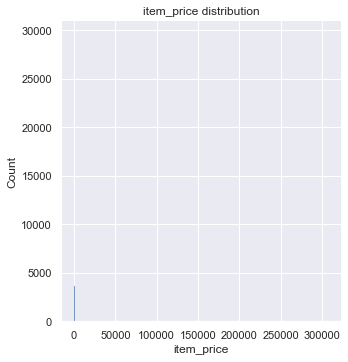

In [50]:
displot(sales_df,'item_price',"item_price distribution")

* as we noticed above there are outliers in max Data and it reflect here on the graph so we couldn't see the data let us remove outliers & graogh the data again 

In [51]:
sales_df_withoutoutliers = sales_df[(sales_df['item_price']>= stats_df['item_price'].loc['min_whisk']) & (sales_df['item_price']<= stats_df['item_price'].loc['max_whisk'])]
sales_df_withoutoutliers

,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
0,2014-09-01,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега"""
1,2014-08-24,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
2,2014-11-12,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
3,2014-07-05,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
4,2014-08-26,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
...,...,...,...,...,...,...,...
233891,2014-10-05,21,1299.0,1.0,Футболка Worms Three Worms Moon S,Подарки - Атрибутика,"Москва ""Распродажа"""
233908,2015-10-03,33,719.0,2.0,Комикс Книги магии,"Книги - Комиксы, манга","Москва ""Распродажа"""
233909,2015-10-01,33,584.0,2.0,Комикс Супермен Земля-1 Книга 3,"Книги - Комиксы, манга","Москва ""Распродажа"""
233910,2015-10-02,33,599.0,1.0,Комикс Темная башня Том 2 Долгая дорога домой,"Книги - Комиксы, манга","Москва ""Распродажа"""


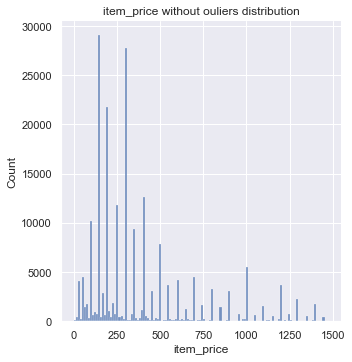

In [52]:
displot(sales_df_withoutoutliers,'item_price',"item_price without ouliers distribution")

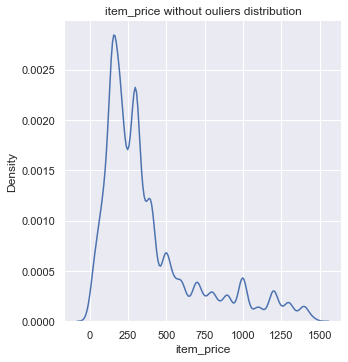

In [53]:
displot(sales_df_withoutoutliers,'item_price',"item_price without ouliers distribution",kind='kde')

* It seems that item price have a big range which we noticed while we computing the range on stats_df the item_price have a range $ 307979.9 including all items price however there are two peak on about item price 200 and another one about on 300 also item price have right skewed.
        * item_cnt_monthly

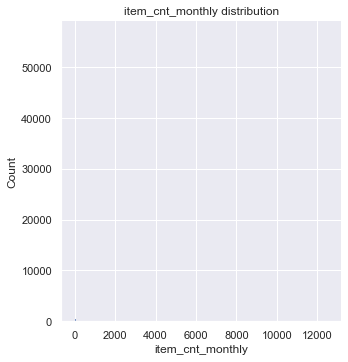

In [54]:
displot(sales_df,'item_cnt_monthly',"item_cnt_monthly distribution")

* as we noticed above there are outliers in Min Data & Max Data and it reflect here on the graph so we couldn't see the data let us remove outliers & graogh the data again 

In [55]:
sales_df_no_cnt_outliers = sales_df[(sales_df['item_cnt_monthly']>= stats_df['item_cnt_monthly'].loc['min_whisk']) & (sales_df['item_cnt_monthly']<= stats_df['item_cnt_monthly'].loc['max_whisk'])]
sales_df_no_cnt_outliers

,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
0,2014-09-01,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега"""
1,2014-08-24,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
2,2014-11-12,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
3,2014-07-05,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
4,2014-08-26,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
...,...,...,...,...,...,...,...
233907,2015-10-01,33,1799.0,15.0,Шарф Adventure Time Lady Rainicorn,Подарки - Атрибутика,"Москва ""Распродажа"""
233908,2015-10-03,33,719.0,2.0,Комикс Книги магии,"Книги - Комиксы, манга","Москва ""Распродажа"""
233909,2015-10-01,33,584.0,2.0,Комикс Супермен Земля-1 Книга 3,"Книги - Комиксы, манга","Москва ""Распродажа"""
233910,2015-10-02,33,599.0,1.0,Комикс Темная башня Том 2 Долгая дорога домой,"Книги - Комиксы, манга","Москва ""Распродажа"""


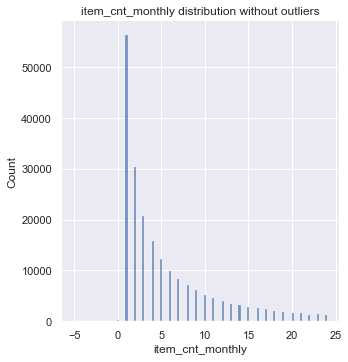

In [56]:
displot(sales_df_no_cnt_outliers,'item_cnt_monthly',"item_cnt_monthly distribution without outliers")

* graph above shows the distribution item quantity sold per month which is right skewed 

* As we can see most of item sold 1 monthly 
* let us see the relation between quantity sold & price

### Project Goal
**2- Bivariate analys**
* **Relation between sales qty & sales price**


In [57]:
def bivariate(df,x,y,title,xlim=None,ylim=None,fsize=12,fwgh=25):
        '''graph relation between Two numerical variable  
        Args:
            -df: Dataframe
            -x(str): numeric variable name
            -x(str): numeric variable name
            -title(str): graph title
            -xlim(int of tuple,None): min & max x axis by default None
            -ylim(int of tuple,None): min & max y axis by default None
            -fszie(int,12): font size 12 by default
            -fwgh(int,25): font weight 25 by default
            -kind(str,hist): distribution graph kind hist by default
        Result:
        Show the displot graph
    '''
        sns.jointplot(data=df,x=x,y=y,xlim=xlim,ylim=ylim)
        plt.title(title,fontdict={'fontsize':fsize,'fontweight':fwgh})
        plt.show()

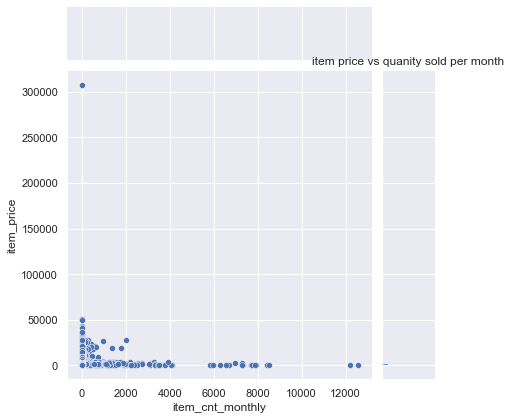

In [58]:
bivariate(sales_df,'item_cnt_monthly','item_price',title='item price vs quanity sold per month')

* As we can see the outliers in both item price & item cnt day can't help us to get a good insights on data 
* Now we will create new data frame with removing outliers on both item_price & item_cnt_monthly.

In [59]:
new_df = sales_df[(sales_df['item_price'].between(stats_df['item_price'].loc['min_whisk'],stats_df['item_price'].loc['max_whisk'])) & (sales_df['item_cnt_monthly'].between(stats_df['item_cnt_monthly'].loc['min_whisk'],stats_df['item_cnt_monthly'].loc['max_whisk']))]
new_df.head()

,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name
0,2014-09-01,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега"""
1,2014-08-24,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
2,2014-11-12,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега"""
3,2014-07-05,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""
4,2014-08-26,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега"""


In [60]:
new_df.shape

(186488, 7)

In [61]:
new_df.describe()

,date_block_num,item_price,item_cnt_monthly
count,186488.000000,186488.000000,186488.000000
mean,14.555178,375.524743,5.447594
std,9.558900,316.108919,5.386166
min,0.000000,0.100000,-5.000000
25%,6.000000,149.000000,1.000000
50%,14.000000,299.000000,3.000000
75%,22.000000,449.000000,8.000000
max,33.000000,1475.860000,24.000000


* **Compute sales per month & year** 

In [62]:
def monthly_sales(row):
    '''compute monthly sales
        Args: 
        row: DataFrame row
        Return series
    '''
    sales = row['item_price'] * row['item_cnt_monthly'] 
    return sales

In [63]:
# apply monthly_sales()function on new_df
new_df['monthly_sales'] = new_df.apply(monthly_sales,axis=1)
new_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name,monthly_sales
0,2014-09-01,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0
1,2014-08-24,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0
2,2014-11-12,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0
3,2014-07-05,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега""",100.0
4,2014-08-26,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0


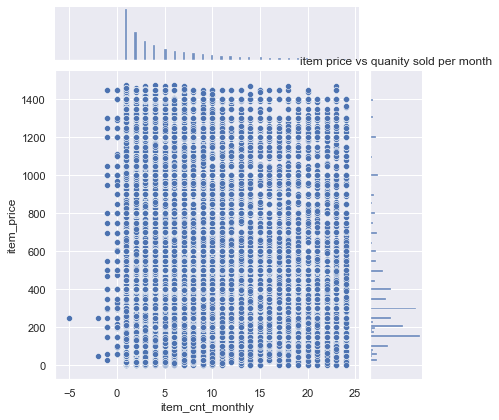

In [64]:
bivariate(new_df,'item_cnt_monthly','item_price',title='item price vs quanity sold per month')

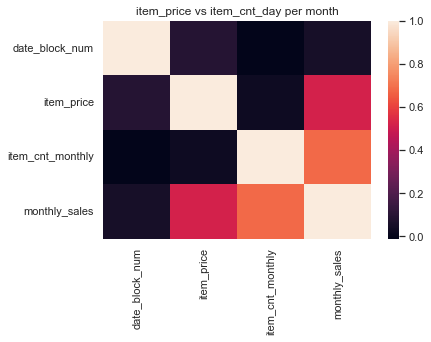

In [65]:
sns.heatmap(new_df.corr())
plt.title("item_price vs item_cnt_day per month")
plt.show()

* it seem that there are no linear correlation between price & quanity sold per month 

* **2- Categorical Variable**

* First will compute the monthly sales for item to check categorical distribution per monthly sales. 
* We have a lot of categories, shops & item let us focus on top 10 & least 10 on each.

In [66]:
def simple_boxplot(df,x,y,cnt,style,palette):
    '''simple box plot graph for 2 variable only:
        Args:
            df: dataframe
            x(str): categorical variable
            y(str): numerical variable 
            cnt(int): number of items want to study
            style(str): figure style
            palette(str): figure color 
        result:
            print top & last number of category variable and graph them on boxplot 
    '''
    top10_catg = df[x].value_counts().head(cnt)
    last10_catg = df[x].value_counts().tail(cnt)
    
    top_ctg_df = df[df[x].isin(top10_catg.index.values)]
    last_ctg_df = df[df[x].isin(last10_catg.index.values)]
    
    
    sns.set_theme(style=style)
    sns.set(font_scale = 2)
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(1,2,figsize=(35, 12))
    f.suptitle(f'{x} distribution based on {y}')

    # Plot the orbital period with horizontal boxes
#     top 10
    ax_0 = sns.boxplot(y=x, x=y, data=top_ctg_df, width=.6, palette=palette,order=top10_catg.index,ax=ax[0])
    ax_0.set(ylabel=x)
    ax_0.set_title(f"Top {cnt} distribution")
    ax_0.set_xscale("log")

#     last 10
    ax_1 = sns.boxplot(y=x, x=y, data=last_ctg_df, width=.6, palette=palette,order=last10_catg.index,ax=ax[1])
    ax_1.set(ylabel=x)
    ax_1.set_title(f"last {cnt} distribution")
    ax_1.set_xscale("log")
    f.tight_layout(pad=2.0);
    plt.show()
    print(f"Top {cnt} {x}\n{top10_catg}")
    print('*'*50)
    print(f"last {cnt} {x}\n{last10_catg}")
    print('*'*50)
    

* **What is the Top 10 categories & least 10 categories**  

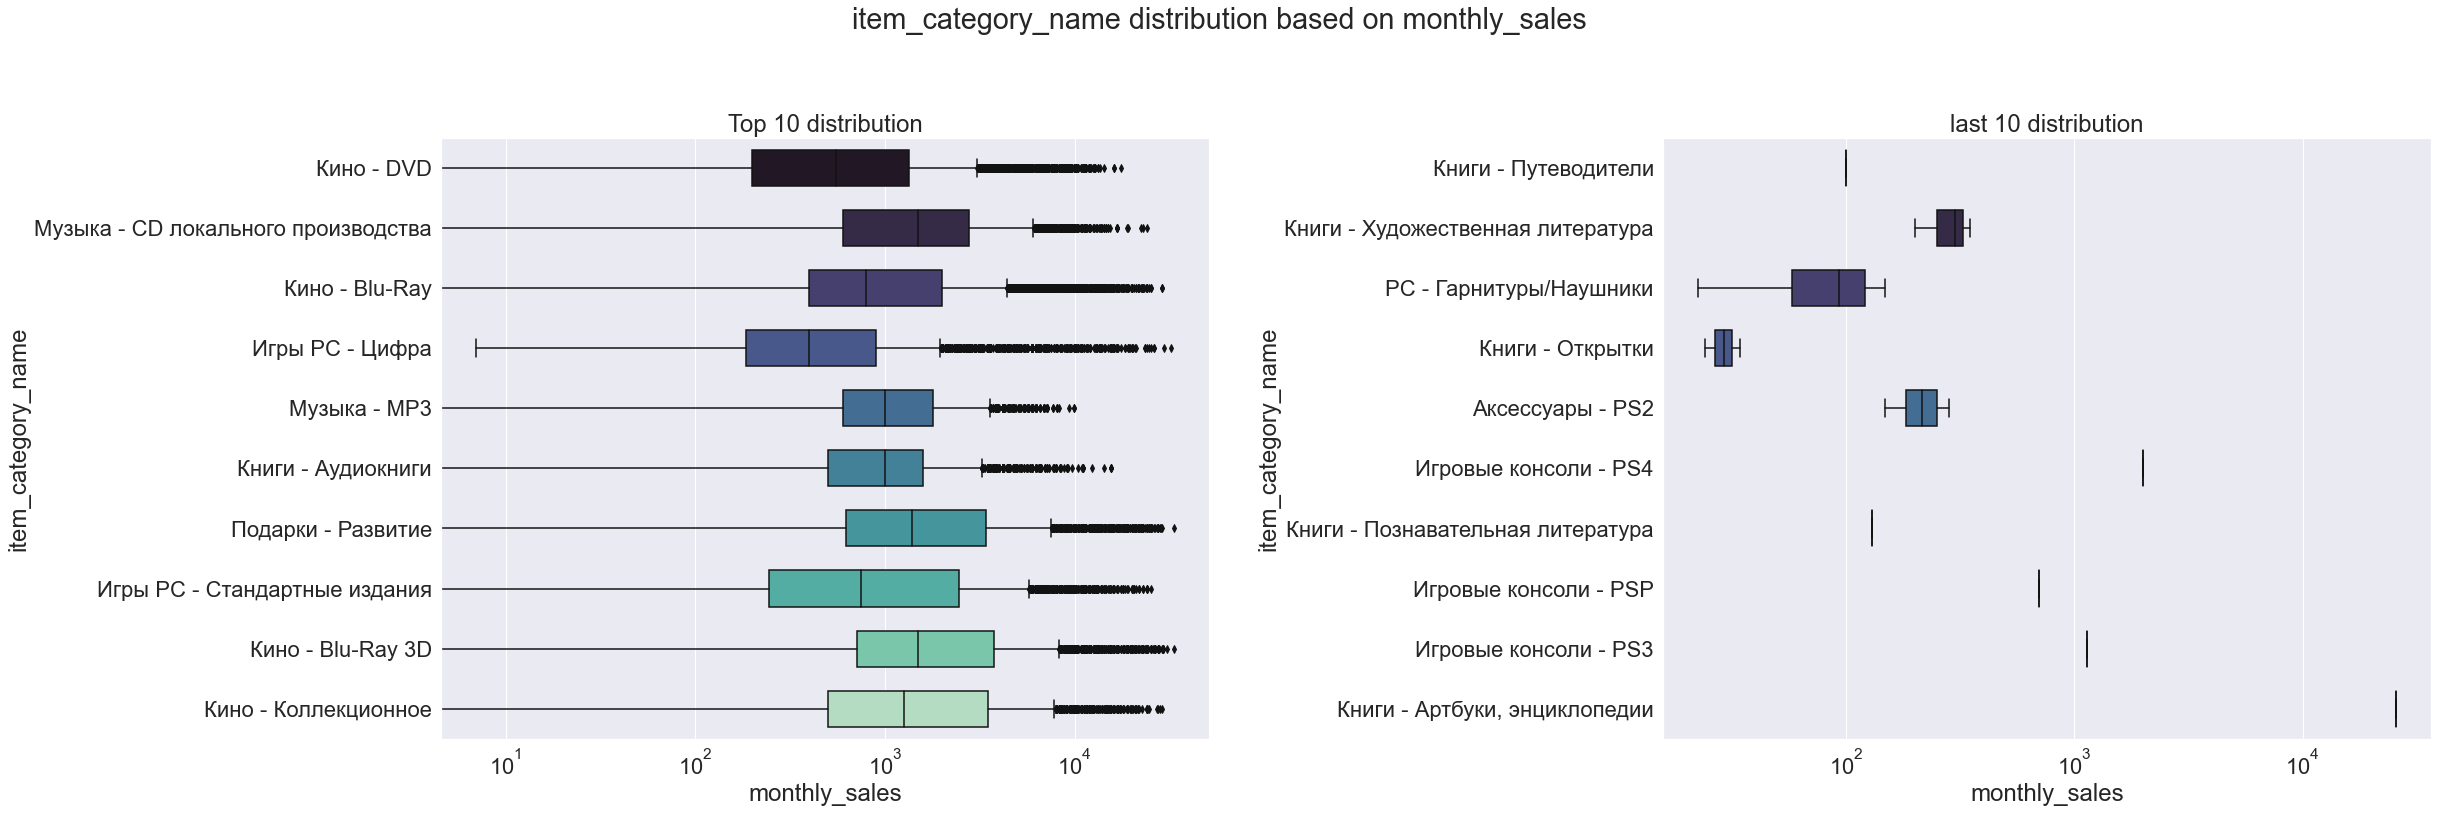

Top 10 item_category_name
Кино - DVD                             48701
Музыка - CD локального производства    31014
Кино - Blu-Ray                         22650
Игры PC - Цифра                         8030
Музыка - MP3                            6549
Книги - Аудиокниги                      6422
Подарки - Развитие                      4874
Игры PC - Стандартные издания           4800
Кино - Blu-Ray 3D                       4521
Кино - Коллекционное                    3344
Name: item_category_name, dtype: int64
**************************************************
last 10 item_category_name
Книги - Путеводители                 3
Книги - Художественная литература    3
PC - Гарнитуры/Наушники              3
Книги - Открытки                     2
Аксессуары - PS2                     2
Игровые консоли - PS4                1
Книги - Познавательная литература    1
Игровые консоли - PSP                1
Игровые консоли - PS3                1
Книги - Артбуки, энциклопедии        1
Name: item_catego

In [67]:
# apply simple_boxplot on item category name
simple_boxplot(new_df,'item_category_name','monthly_sales',10,'darkgrid',"mako")

* All Top 10 categories are right skewed. 
* Книги - Художественная литература & PC - Гарнитуры/Наушники category item are left skewed on last 10 categories
* The Least 25% of lowest data are more disperssion the the upper 25% of the max data on all top 10 categories.
* there are a lot of outliers o max values.  

* **What is the Top 10 shops & least 10 shops**

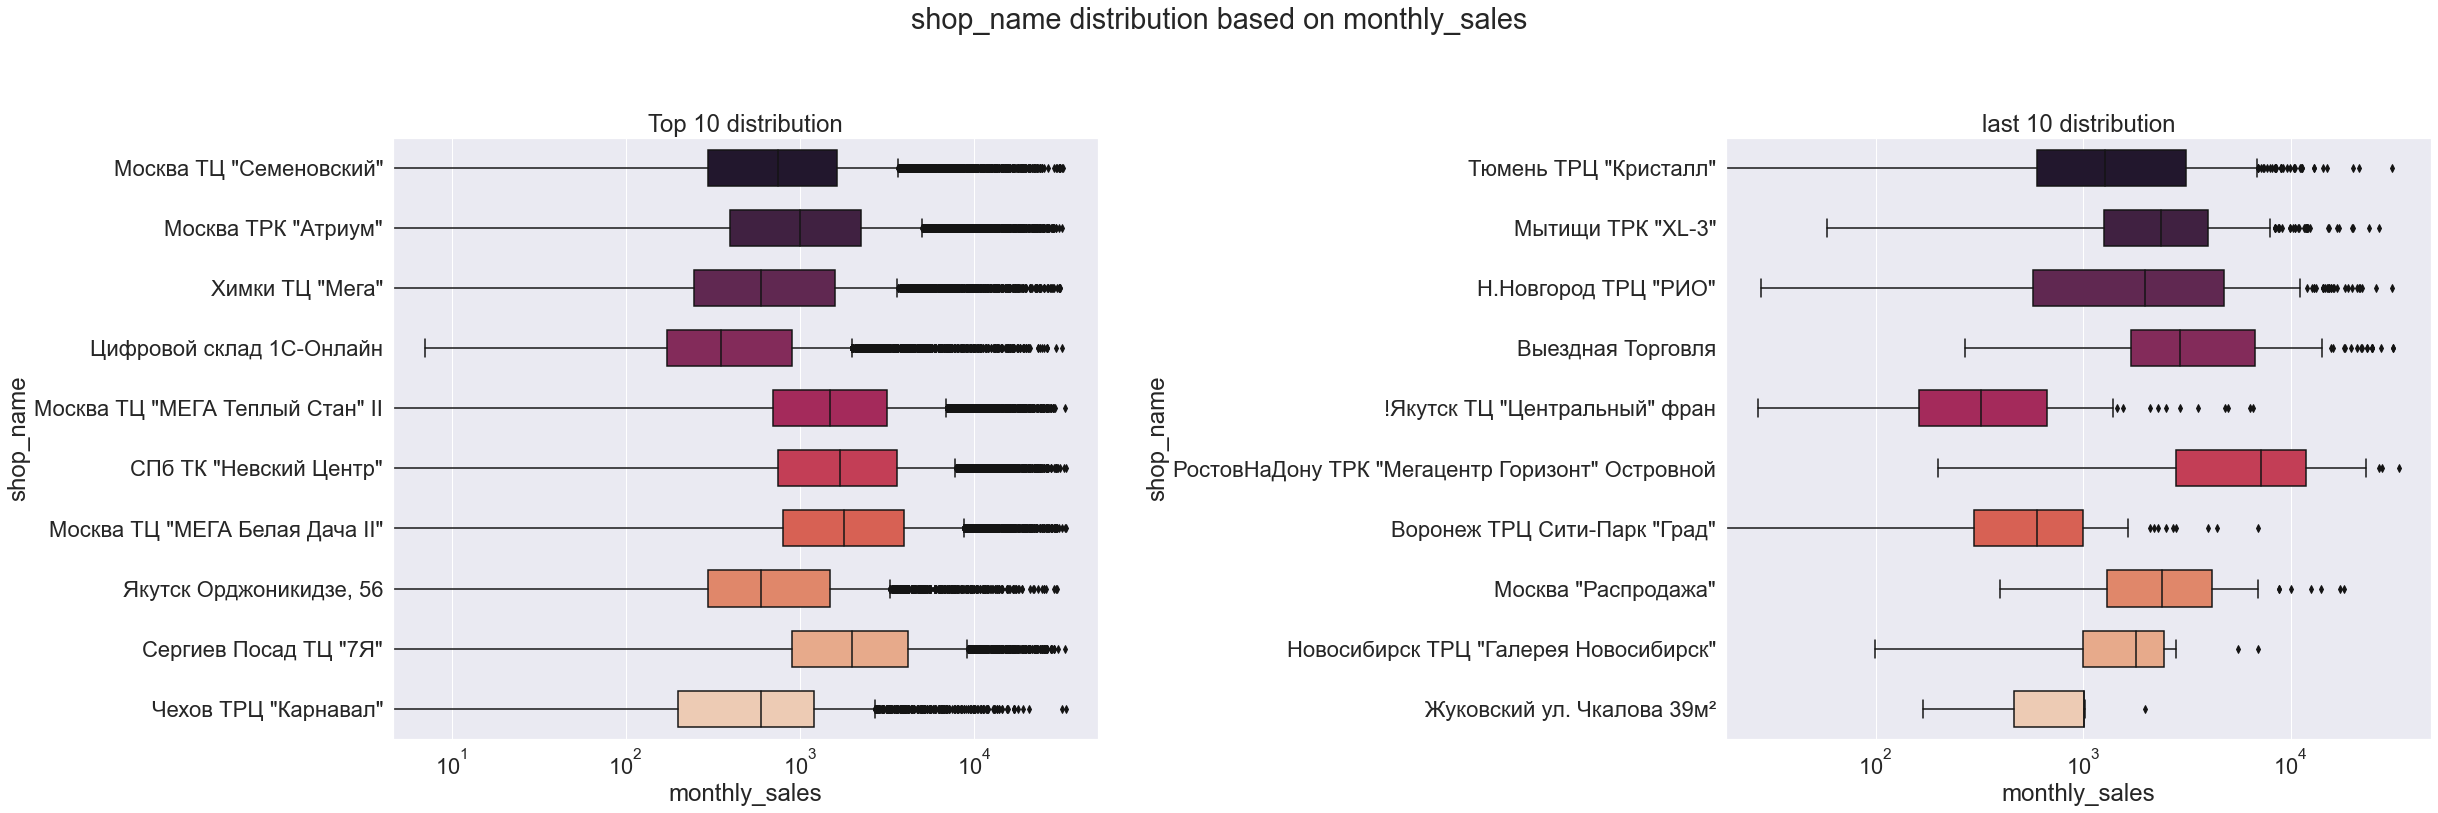

Top 10 shop_name
Москва ТЦ "Семеновский"            20258
Москва ТРК "Атриум"                19510
Химки ТЦ "Мега"                    12813
Цифровой склад 1С-Онлайн           11464
Москва ТЦ "МЕГА Теплый Стан" II    10728
СПб ТК "Невский Центр"             10500
Москва ТЦ "МЕГА Белая Дача II"      7134
Якутск Орджоникидзе, 56             6533
Сергиев Посад ТЦ "7Я"               4622
Чехов ТРЦ "Карнавал"                4284
Name: shop_name, dtype: int64
**************************************************
last 10 shop_name
Тюмень ТРЦ "Кристалл"                              410
Мытищи ТРК "XL-3"                                  339
Н.Новгород ТРЦ "РИО"                               300
Выездная Торговля                                  286
!Якутск ТЦ "Центральный" фран                      207
РостовНаДону ТРК "Мегацентр Горизонт" Островной    110
Воронеж ТРЦ Сити-Парк "Град"                        97
Москва "Распродажа"                                 64
Новосибирск ТРЦ "Галерея Новосибир

In [68]:
# apply simple_boxplot on shop name
simple_boxplot(new_df,'shop_name','monthly_sales',10,'darkgrid',"rocket")

* All Top 10 shops are right skewed. 
* most of last 10 shops 
* The Least 25% of lowest data are more disperssion the the upper 25% of the max data on all top and last 10 shops.
* there are a lot of outliers on max values.  

* **What is the best 10 items and the least 10 items**

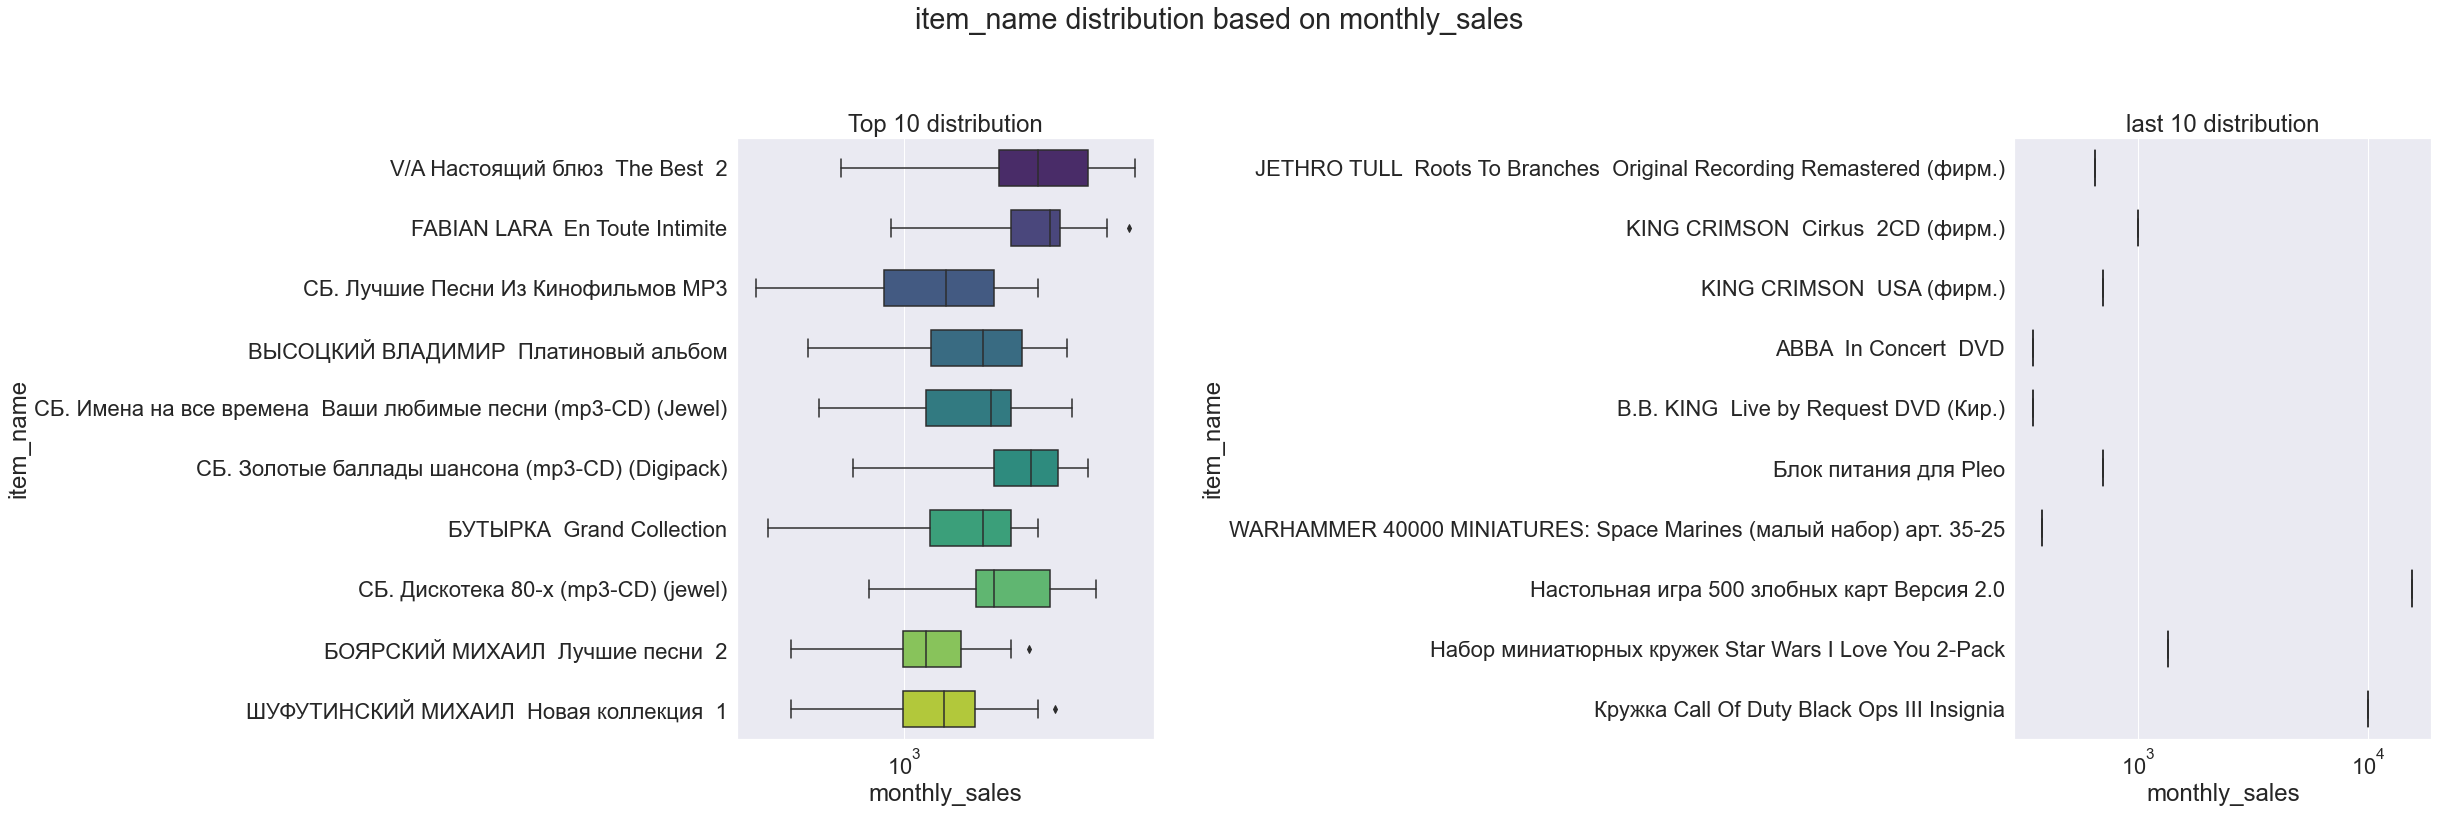

Top 10 item_name
V/A Настоящий блюз  The Best  2                                  34
FABIAN LARA  En Toute Intimite                                   34
СБ. Лучшие Песни Из Кинофильмов МР3                              34
ВЫСОЦКИЙ ВЛАДИМИР  Платиновый альбом                             34
СБ. Имена на все времена  Ваши любимые песни (mp3-CD) (Jewel)    34
СБ. Золотые баллады шансона (mp3-CD) (Digipack)                  34
БУТЫРКА  Grand Collection                                        34
СБ. Дискотека 80-х (mp3-CD) (jewel)                              34
БОЯРСКИЙ МИХАИЛ  Лучшие песни  2                                 34
ШУФУТИНСКИЙ МИХАИЛ  Новая коллекция  1                           34
Name: item_name, dtype: int64
**************************************************
last 10 item_name
JETHRO TULL  Roots To Branches  Original Recording Remastered (фирм.)    1
KING CRIMSON  Cirkus  2СD (фирм.)                                        1
KING CRIMSON  USA (фирм.)                             

In [69]:
# apply simple_boxplot on shop name
simple_boxplot(new_df,'item_name','monthly_sales',10,'darkgrid',"viridis")

* **Top 10 items:** 
    * some items are right skewed and other item are left skewed
    * The Least 25% of lowest data are more disperssion than the upper 25% of the max data on all top 10 items.
    * FABIAN LARA  En Toute Intimite, БОЯРСКИЙ МИХАИЛ  Лучшие песни  2 & ШУФУТИНСКИЙ МИХАИЛ  Новая коллекция  1 have ouliers on max data.
    
* **Last 10 items:**    
    * all of them had been sold only in one month during the period of 2013 till 2015.  
### Now let us focus on Tops 

In [70]:
def simple_count(df,x,y,cnt,style,palette,kind='violin',by=None):
    '''simple box plot graph for 2 variable only:
        Args:
            df: dataframe
            x(str): categorical variable
            y(str): numerical variable 
            by(str): categorical variable
            cnt(int): number of items want to study
            style(str): figure style
            palette(str): figure color 
        result:
            print top & last number of category variable and graph them on boxplot 
    '''
    top10_catg = df[x].value_counts().head(cnt)
    last10_catg = df[x].value_counts().tail(cnt)
    
    top_ctg_df = df[df[x].isin(top10_catg.index.values)]
    last_ctg_df = df[df[x].isin(last10_catg.index.values)]
    
    
    sns.set_theme(style=style)
#     sns.set(font_scale = 2)

    # Plot the orbital period with horizontal boxes
#     top 10
    g=sns.catplot(y=x, x=y, data=top_ctg_df,hue=by,kind=kind,palette=palette,order=top10_catg.index,height=5, aspect=2)
    g.set_axis_labels(y, x)
    plt.title(f"Top {cnt} {y} by {x} distribution")
    
    plt.show()

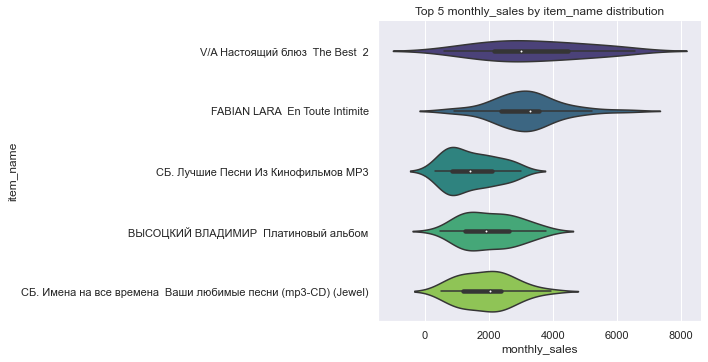

In [71]:
simple_count(new_df,'item_name','monthly_sales',5,'darkgrid',"viridis")

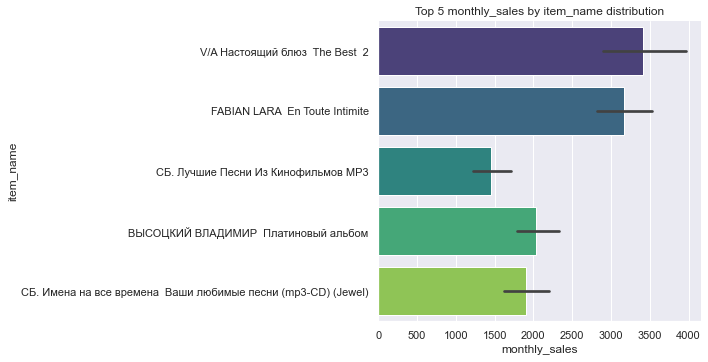

In [72]:
simple_count(new_df,'item_name','monthly_sales',5,'darkgrid',"viridis",kind='bar')

* Most Top 5 item sales have the range between 1000 to 4000.
* V/A Настоящий блюз  The Best  2 although it has the top sales but it's the most disperssion also it has a lot of outliers in both maximum & minimum sales limit.
* СБ. Имена на все времена  Ваши любимые песни (mp3-CD) (Jewel) has the Fifth rank but sales are more condensed in the range about  1000 to 1800.  

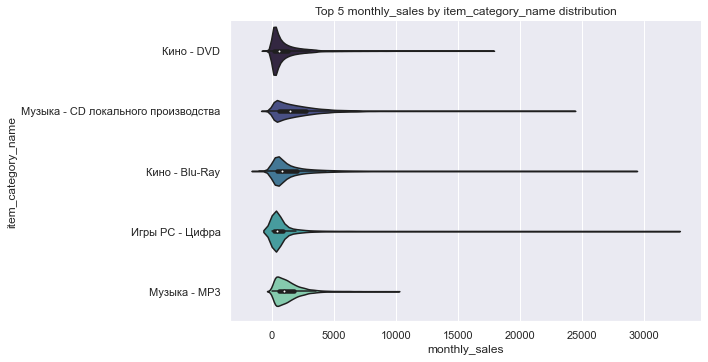

In [73]:
simple_count(new_df,'item_category_name','monthly_sales',5,'darkgrid',"mako")

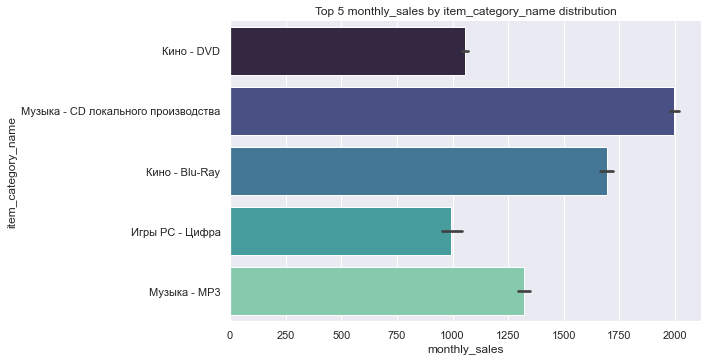

In [74]:
simple_count(new_df,'item_category_name','monthly_sales',5,'darkgrid',"mako",kind='bar')

* all top 5 Categories are right skewed , Most sales condensed in the range about 1000 to 2000 also there are alot of outliers.
* Музыка - CD локального производства has the maximum sales & Игры PC - Цифра has the minimum sales in the top 5 . 

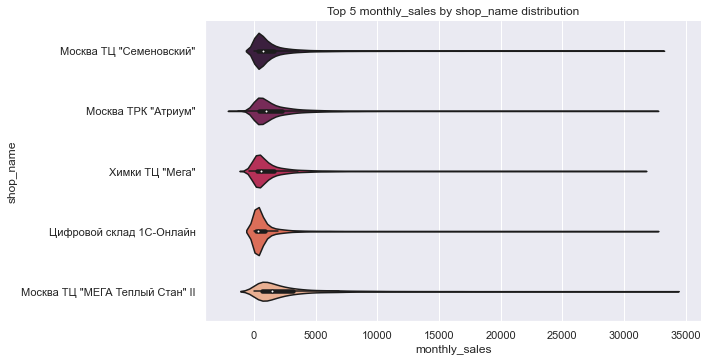

In [75]:
simple_count(new_df,'shop_name','monthly_sales',5,'darkgrid',"rocket")

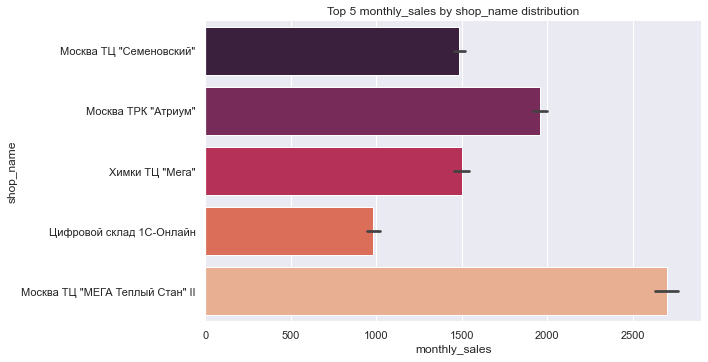

In [76]:
simple_count(new_df,'shop_name','monthly_sales',5,'darkgrid',"rocket",kind='bar')

* All top 5 shops are right skewed , Most sales condensed in the range about 1000 to 2000 also there are a lot of outliers. 
* Москва ТЦ "МЕГА Теплый Стан" II has the maximum sales & Цифровой склад 1С-Онлайн has the minimum sales of top 5
### Multiplot

In [77]:
def tops_df(df,x,y,cnt,style,palette,kind='violin',by=None):
    '''simple box plot graph for 2 variable only:
        Args:
            df: dataframe
            x(str): categorical variable
            y(str): numerical variable 
            by(str): categorical variable
            cnt(int): number of items want to study
            style(str): figure style
            palette(str): figure color 
        result:
            print top & last number of category variable and graph them on boxplot 
    '''
    top_catg = df[x].value_counts().head(cnt)
    top_by = df[by].value_counts().head(cnt)
    
    top_df = df[(df[x].isin(top_catg.index.values)) & (df[by].isin(top_by.index.values))]
    
    
    sns.set_theme(style=style)
#     sns.set(font_scale = 2)

    # Plot the orbital period with horizontal boxes
#     top 10
    g=sns.catplot(y=x, x=y, data=top_df,hue=by,kind=kind,palette=palette,order=top_catg.index,height=5, aspect=2)
    g.set_axis_labels(y, x)
    plt.title(f"Top {cnt} {y} by {x} and {by} distribution")
    
    plt.show()

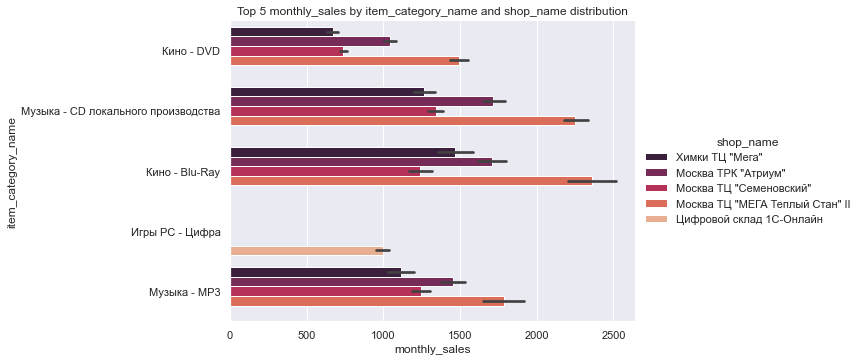

In [78]:
tops_df(new_df,'item_category_name','monthly_sales',5,'darkgrid','rocket',kind='bar',by='shop_name')

* Музыка - CD локального производства has the maximum sales but it's not sold in Цифровой склад 1С-Онлайн shop, most sales of that item in Москва ТЦ "МЕГА Теплый Стан" II shop. 
* Москва ТЦ "МЕГА Теплый Стан" II shop has the most sales of all categories except Игры PC - Цифра category.
* Игры PC - Цифра sold only in Цифровой склад 1С-Онлайн shop also this shop dpesn't sold any one of top 5 categories except that. 

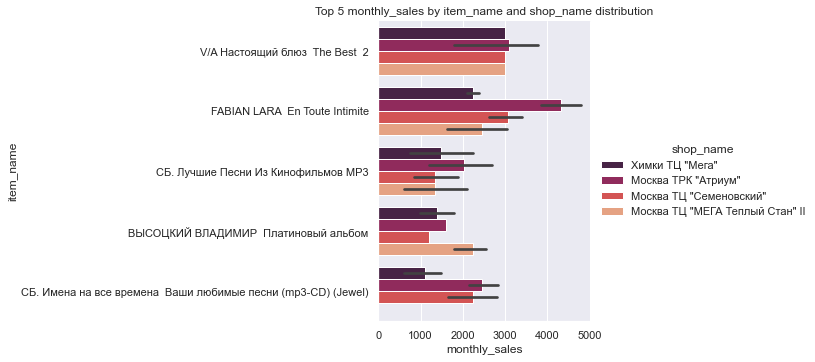

In [79]:
tops_df(new_df,'item_name','monthly_sales',5,'darkgrid','rocket',kind='bar',by='shop_name')

* V/A Настоящий блюз  The Best  2 item is the top sales & most shops have about the same sales for that item except Москва ТРК "Атриум" have max sales & some outliers . 
* Москва ТРК "Атриум" have the max sales on all top item except ВЫСОЦКИЙ ВЛАДИМИР  Платиновый альбом. 
* Москва ТЦ "МЕГА Теплый Стан" II has the max sales for ВЫСОЦКИЙ ВЛАДИМИР  Платиновый альбом item & it's not sell СБ. Имена на все времена  Ваши любимые песни (mp3-CD) (Jewel) item.

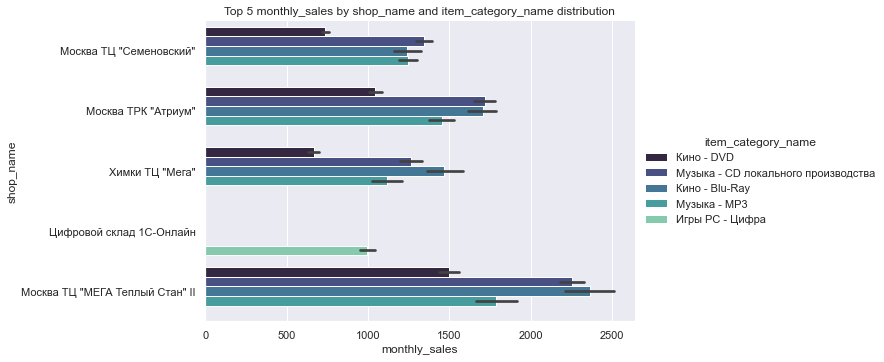

In [80]:
tops_df(new_df,'shop_name','monthly_sales',5,'darkgrid','mako',kind='bar',by='item_category_name')

* Москва ТЦ "МЕГА Теплый Стан" II has the maximum sales but there are ouliers and it's not sell the Игры PC - Цифра category. 
* Цифровой склад 1С-Онлайн shop sell only Игры PC - Цифра category on the top 5

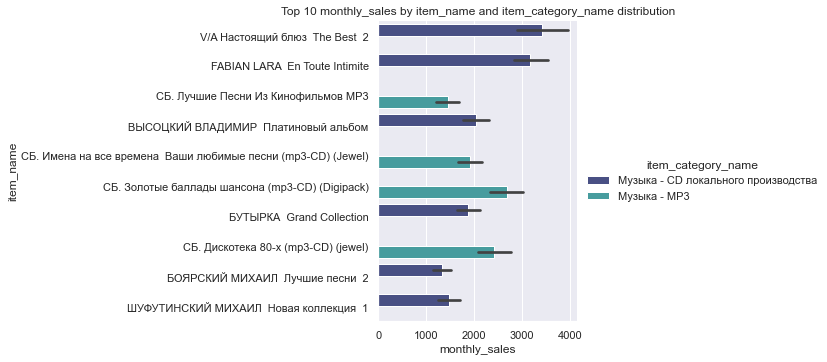

In [81]:
tops_df(new_df,'item_name','monthly_sales',10,'darkgrid','mako',kind='bar',by='item_category_name')

* Most Top 10 Item have the Музыка - CD локального производства & Музыка - MP3 category. 
* Most top item sales condensed in the range between 1000 till 3000

* **Which Month have the best sales & in which year**
* Let us explore Sales per month & year first

In [82]:
new_df['month_year_number'] = new_df['date_block_num'].apply(str)
new_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name,monthly_sales,month_year_number
0,2014-09-01,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0,20
1,2014-08-24,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0,19
2,2014-11-12,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0,22
3,2014-07-05,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега""",100.0,18
4,2014-08-26,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0,19


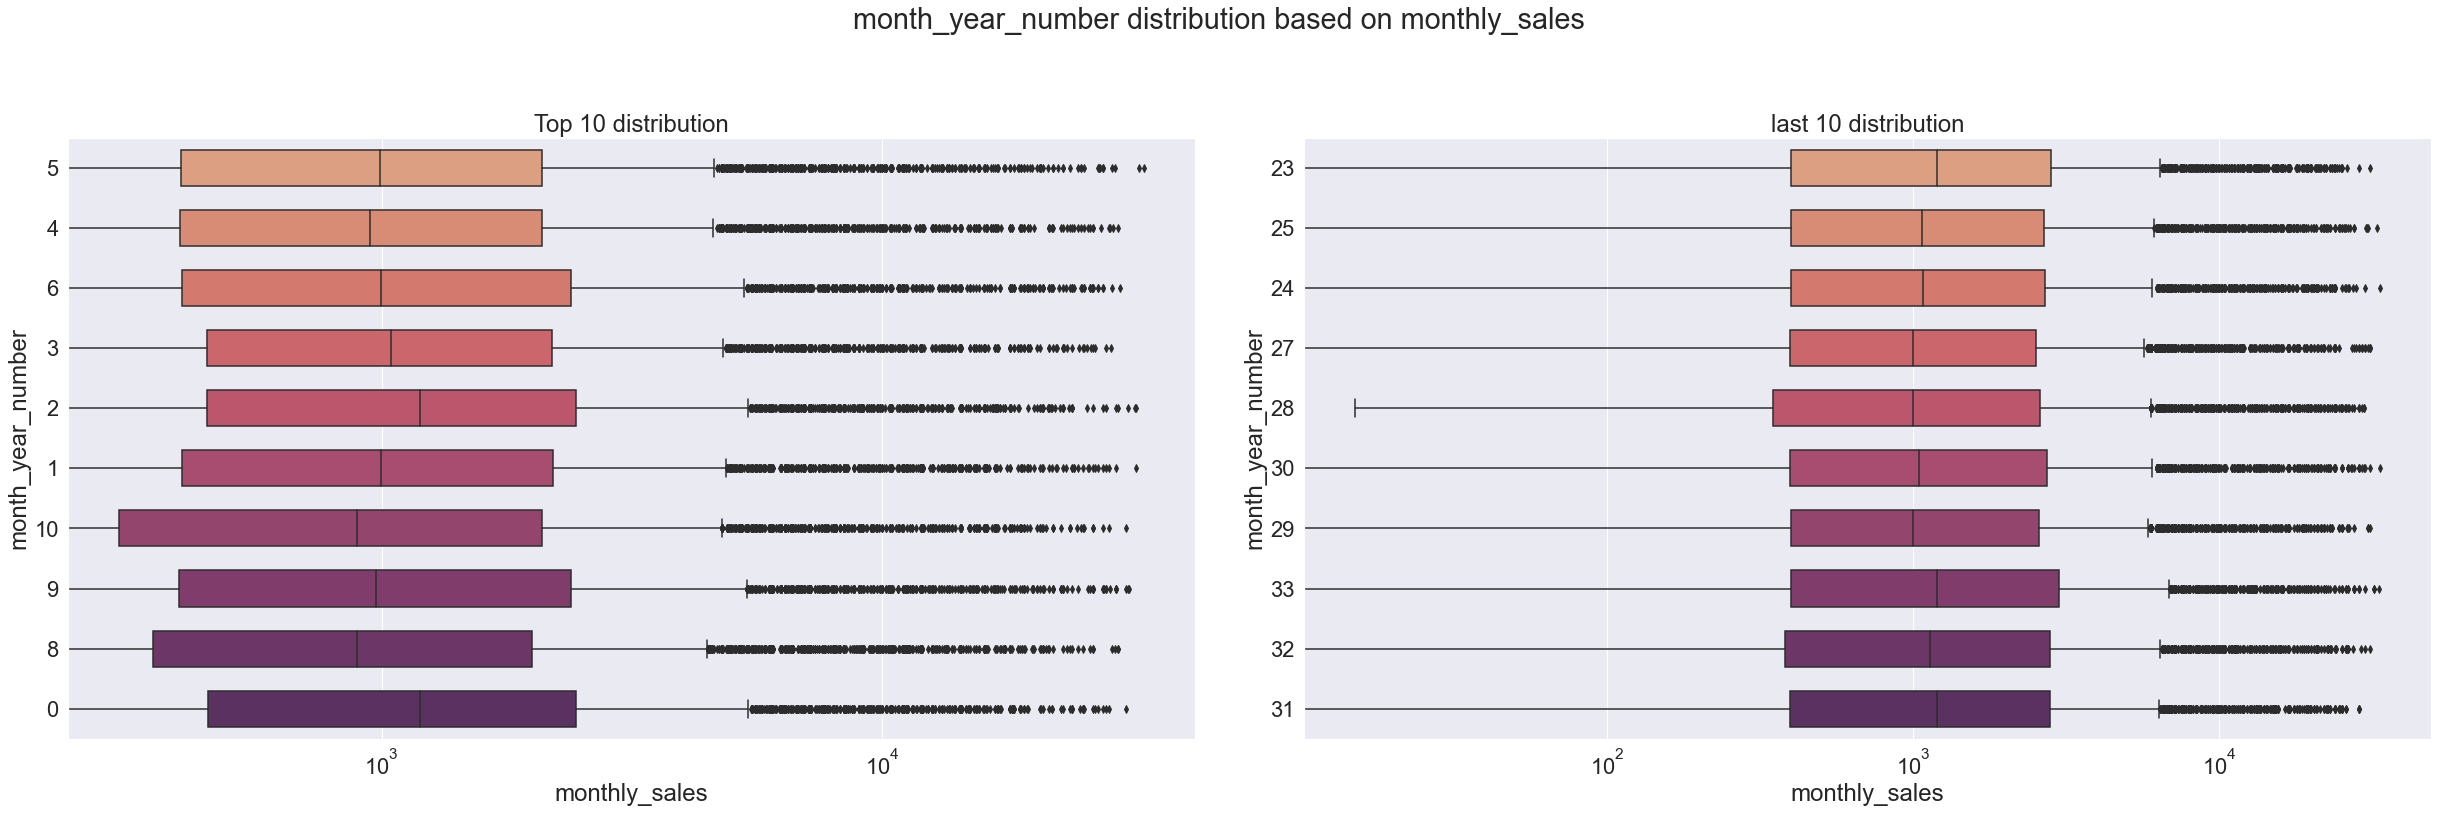

Top 10 month_year_number
5     7163
4     7050
6     6985
3     6831
2     6784
1     6784
10    6688
9     6671
8     6612
0     6600
Name: month_year_number, dtype: int64
**************************************************
last 10 month_year_number
23    4599
25    4575
24    4479
27    4199
28    4031
30    4014
29    3953
33    3848
32    3823
31    3802
Name: month_year_number, dtype: int64
**************************************************


In [83]:
simple_boxplot(new_df,'month_year_number','monthly_sales',10,'darkgrid',"flare")

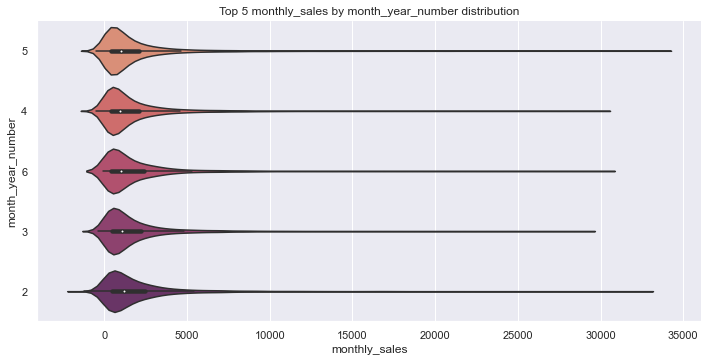

In [84]:
simple_count(new_df,'month_year_number','monthly_sales',5,'darkgrid',"flare")

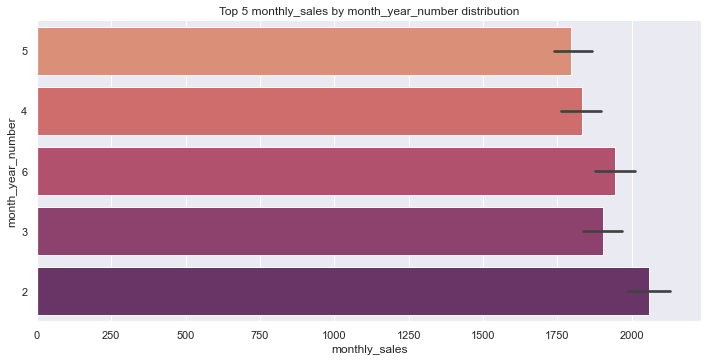

In [85]:
simple_count(new_df,'month_year_number','monthly_sales',5,'darkgrid',"flare",kind='bar')

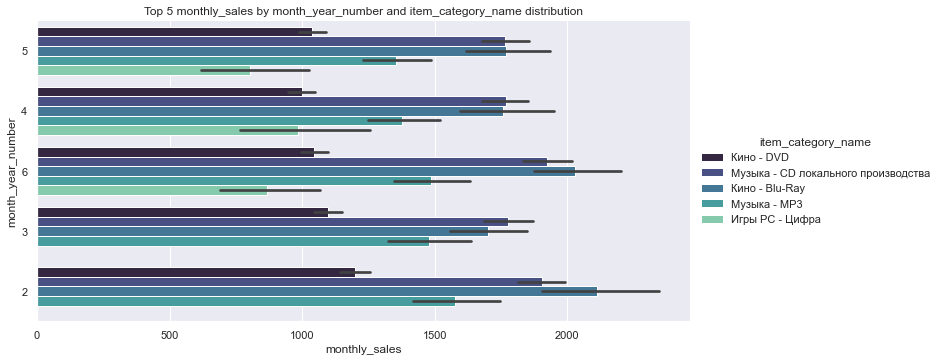

In [86]:
tops_df(new_df,'month_year_number','monthly_sales',5,'darkgrid','mako',kind='bar',by='item_category_name')

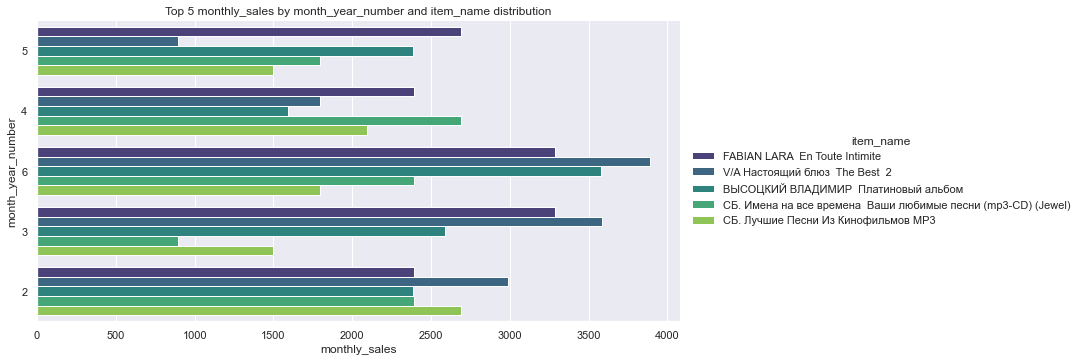

In [87]:
tops_df(new_df,'month_year_number','monthly_sales',5,'darkgrid','viridis',kind='bar',by='item_name')

In [88]:
best_month_year = new_df[(new_df['date_block_num'] == 2) | (new_df['date_block_num'] == 6)]['date'].apply(lambda x:x.strftime('%Y%m')).unique()
best_month_year

array(['201303', '201307'], dtype=object)

* We Can find that March 2013 has the maximum sales per month & year however Top 5 items has the maximum sales on july 2013

* **Explore sales by year**

In [89]:
new_df['year'] = new_df['date'].dt.year.astype(str)
new_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,date_block_num,item_price,item_cnt_monthly,item_name,item_category_name,shop_name,monthly_sales,month_year_number,year
0,2014-09-01,20,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0,20,2014
1,2014-08-24,19,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0,19,2014
2,2014-11-12,22,58.0,1.0,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0,22,2014
3,2014-07-05,18,100.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега""",100.0,18,2014
4,2014-08-26,19,58.0,1.0,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,"Химки ТЦ ""Мега""",58.0,19,2014


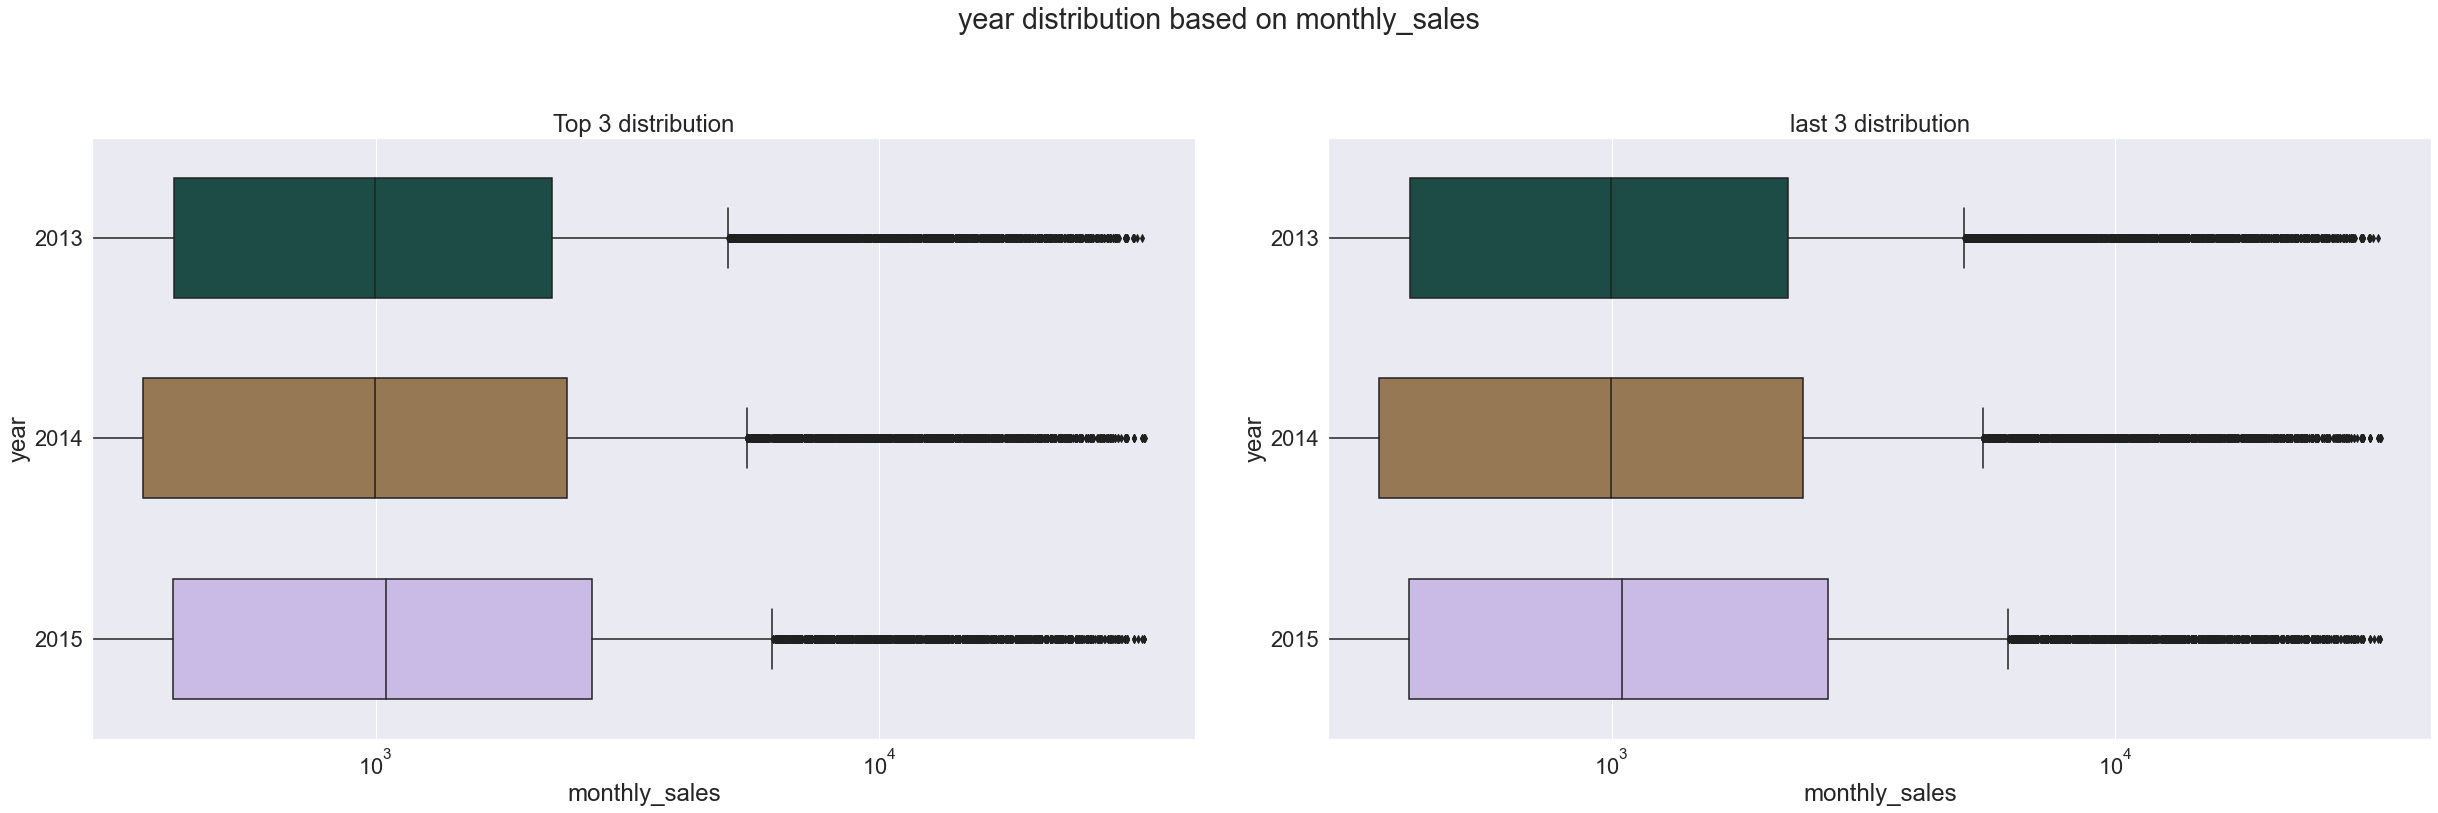

Top 3 year
2013    81325
2014    63831
2015    41332
Name: year, dtype: int64
**************************************************
last 3 year
2013    81325
2014    63831
2015    41332
Name: year, dtype: int64
**************************************************


In [90]:
simple_boxplot(new_df,'year','monthly_sales',3,'darkgrid',"cubehelix")

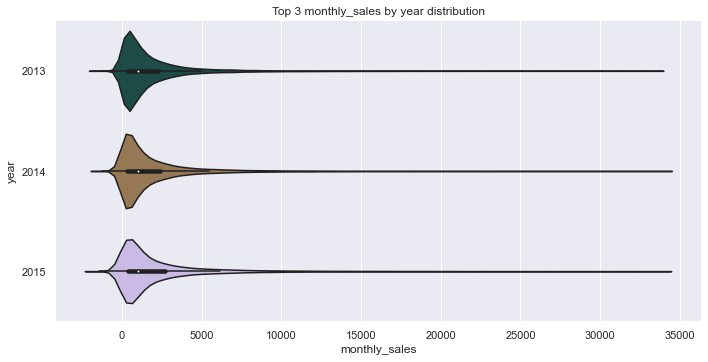

In [91]:
simple_count(new_df,'year','monthly_sales',3,'darkgrid',"cubehelix")

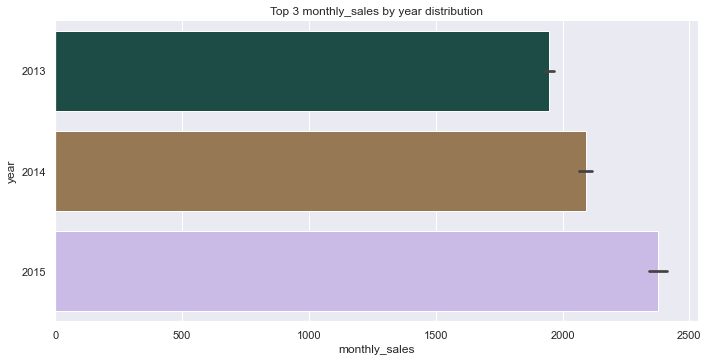

In [92]:
simple_count(new_df,'year','monthly_sales',3,'darkgrid',"cubehelix",kind='bar')

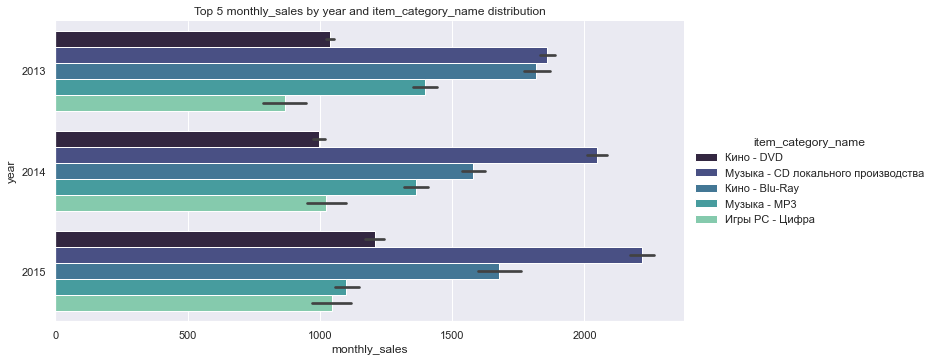

In [93]:
tops_df(new_df,'year','monthly_sales',5,'darkgrid','mako',kind='bar',by='item_category_name')

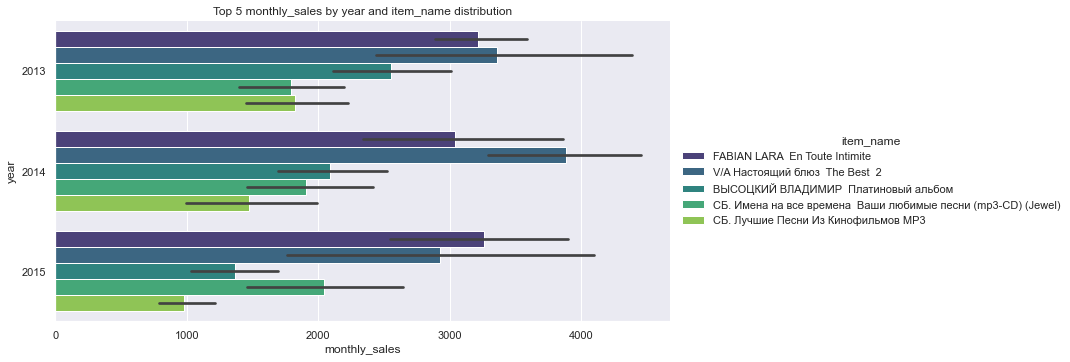

In [94]:
tops_df(new_df,'year','monthly_sales',5,'darkgrid','viridis',kind='bar',by='item_name')

* 2015 has the best sales and it has the maximum sales on Музыка - CD локального производства category. 
* there are maximum outliers on sales per year. 

<a id='conclusions'></a>
## Conclusions
* There are no linear correlation between sales price & quantity sold.
* The top 10 for both item category , shops , and item are changed by frequency sometimes they are changed when we reflect data to monthly sales 
* 2015 has the best sales & march 2013 is the best month on sales. 
* Most Top 10 Item have the Музыка - CD локального производства & Музыка - MP3 category.

## Limitation
* Data has a lot of outliers. 
* Focused on the top of both categories entities. 